In [1]:
import h2o
import matplotlib.pyplot as plt

In [2]:
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ghk829/miniconda2/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb0zkUQ
  JVM stdout: /tmp/tmpb0zkUQ/h2o_ghk829_started_from_python.out
  JVM stderr: /tmp/tmpb0zkUQ/h2o_ghk829_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,3 months and 18 days !!!
H2O cluster name:,H2O_from_python_ghk829_ieeb45
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

In [4]:
df = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
df['C9'] = df['C9'].asfactor()

In [10]:
df['C9'].levels()

[['0', '1']]

In [11]:
splits = df.split_frame(ratios=[0.7, 0.15]) 

In [32]:
train = splits[0]
valid = splits[1]
test = splits[2]

In [33]:
x_names= df.col_names[0:8]
y_names = df.col_names[8]

In [34]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [35]:
fit1 = H2ORandomForestEstimator(model_id = 'fit1')

In [36]:
fit1.train(x=x_names, y=y_names, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


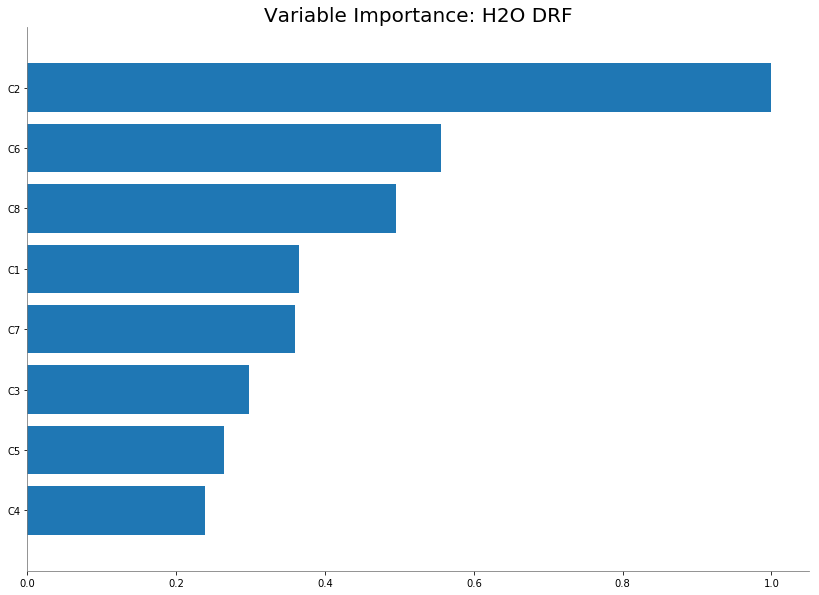

In [37]:
fit1.varimp_plot()

# Pandas to H2o

In [31]:
import pandas as pd
df=pd.read_csv(url,header=None,names=['col1','col2','col3','col4','col5','col6','col7','col8'])

In [33]:
df=h2o.H2OFrame(python_obj=df.to_dict("list"))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
h2o.shutdown()

[WARNING] in <ipython-input-24-bd1e984f485f> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_b678 closed.
